In [1]:
using Plots
using LaTeXStrings

# Load the library
include("SCM_lib.jl");

# Adult-adult competition and adult-juvenile predation

In this example we consider a community formed by $n$ species in which the populations are structured into adults and juveniles ($s=2$ stages). Adult-adult interactions are competitive while adult-juvenile interactions are predator-prey.

Note that in our mathematical framework we perform a change of variables:

- Abundance of the $1^{st}$ stage $\to$ total population abundance (i.e. the sum of the abundances of all stages)
- Abundance of the other stages $\to$ fractional stage abundance (i.e. the ratio of the stages abundances to the total population abundance)

In this particular case, the change of variables reads:

- Adult abundance $\to$ total population abundance (i.e. the sum of adult and juvenile abundances)
- Juvenile abundance $\to$ fractional juvenile abundance (i.e. the ratio of juvenile abundance to total population abundance)

Thus, when parametrizing the structured community matrix, $\bold{M}_s$, using random matrices, we are parametrizing the interaction between the latter variables. So, in ecological terms, in this example we consider that:

- $\bold{M}_1$: An increase (decrease) of the total population abundance of species $j$ would cause a decrease (increase) of the growth rate of the total population of species $i$ and the same the other way round (i.e. competition between total population abundances)

- $\bold{M_2}$: **If species $i$ is predator and species $j$ is prey**, an increase (decrease) of the fractional juvenile abundance of species $j$ would cause an increase (decrease) of the growth rate of the total population abundance of species $i$, while an increase (decrease) of the fractional juvenile abundance of species $i$ would cause a decrease (increase) of the growth rate of the total population abundance of species $j$. These relationships would be reversed if $i$ is prey and $j$ is predator.

- $\bold{M_3}$: **If species $i$ is predator and species $j$ is prey**, an increase (decrease) of the total population abundance of species $j$ would cause an increase (decrease) of the groth rate of the fractional juvenile abundance of species $i$, while an increase (decrease) of the total population abundance of species $i$ would cause a decrease (increase) of the growth rate of the fractional juvenile abundance of species $j$. These relationships would be reversed if $i$ is prey and $j$ is predator.

- $\bold{M_4}$: An increase (decrease) of the fractional juvenile abundance of species $j$ would cause a decrease (increase) of the growth rate of the fractional juvenile abundance of species $i$ and the same the other way round (i.e. competition between fractional juvenile abundances)

Note that the effect of a change on total population abundance of a given species $i$ (predator or prey) to the growth rate of either the total population or fraction of juveniles of a given species $j$, will ultimately depend on the specific functional form of the interactions between the stages of the different species. So other relationships could be thought of for a community with adult-adult competition and adult-juvenile predation. 

In any case, here we show that population structure strongly influences community stability. In the example below, we parametrize the structured community matrix following these rules (above) and set the interaction strength of the adult-adult competition higher than the self-regulation term, $\gamma_1>\mu$. This ensures that $M_1$ will have at least one positive eigenvalue, as this sub-matrix (which is a random matrix) does not fulfill the stability criterion derived by Allesina et al. 2012 (of course you can test this below numerically). Because $M_1=M$ is the traditional community matrix (as shown before in the derivation of the structured community matrix), this means that if we ignored the structure of the population (and only considered total population to total population interactions, which is indeed equivalent to setting $\gamma_2=\gamma_3=\gamma_4=0$), we would conclude that the community is unstable. However, we observe that the eigenvalues of the structured community matrix (the Jacobian of the stage-structured model) has **NO** positive eigenvalues. Thus, population structure provides stability (in this case! we also show that competitive adult-juvenile interactions are destabilizing).


Largest eigenvalue Structured Community Matrix: -0.0725
Largest eigenvalue traditional Community Matrix (M_1, corresponding to an equivalent unstructured model): 0.1746


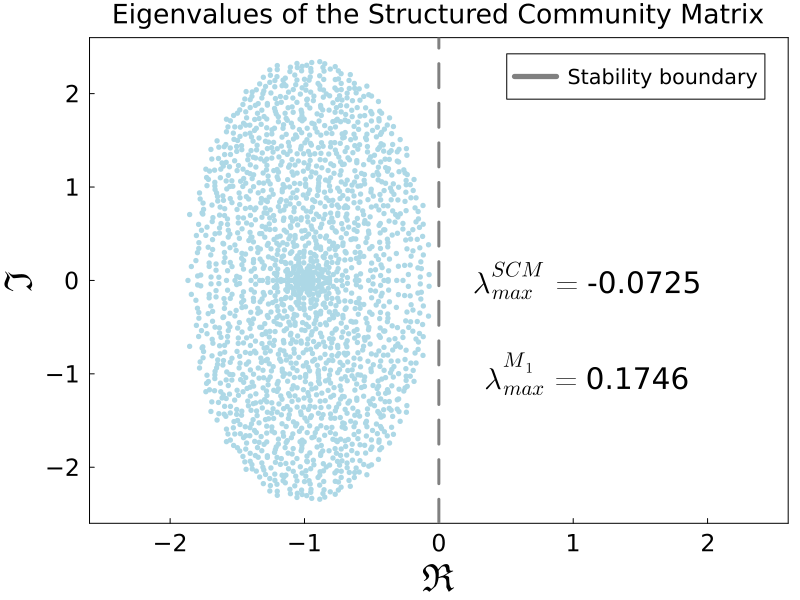

In [2]:
n = 1000 # Number of species
s = 2 # Number of stages (only implemented for s=2)

μ = 1.0 # Growth rate -- diagonal entries of the M_1 and M_4 sub-matrices
C = 1.0 # Pairwise interaction probability

γ_1 = 1.2 # Strength of adult-adult competition (mathematically, total population to total population interaction)
γ_2 = 0.5 # Strength of adult-juvenile predation (mathematically, total population to fraction of juvenile population interaction)
γ_3 = 0.5 # Strength of juvenile-adult predation (mathematically, fraction of juvenile population to total population interaction)
γ_4 = 0.0 # Strength of juvenile-juvenile competition (mathematically, fraction of juvenile population to fraction of juvenile population interaction)

# Calculate the values of σ
denom = sqrt(n * C) * (1 + (2 - 2 * C) / (pi - 2 * C)) * sqrt((pi - 2 * C) / pi) + C * sqrt(2 / pi)

σ_1 = γ_1 / denom # Competition
σ_2 = (γ_2 / (sqrt(n) * C)) * (pi / (pi - 2)) # Predation 
σ_3 = (γ_3 / (sqrt(n) * C)) * (pi / (pi - 2)) # Predation
σ_4 = γ_4 / denom # Competition

# The firtst type refers to adult-adult and juvenile-juvenile interaction and the second type refers to juvenile-juvenile interaction. 
interaction_type = "competition_predation" 

# Compute the structured community matrix (SCM)
M = structured_community_matrix(n, s, μ, σ_1, σ_2, σ_3, σ_4, C, interaction_type)

M_1 = M[1:n, 1:n]

# Compute the eigenvalues of the SCM
eigenvalues = eigvals(M)

λ_max_SCM = round(maximum(real(eigenvalues)), digits=4)
λ_max_M = round(maximum(real(eigvals(M_1))), digits=4)

# Print largest eigenvalue
println("Largest eigenvalue Structured Community Matrix: ", λ_max_SCM)
println("Largest eigenvalue traditional Community Matrix (M_1, corresponding to an equivalent unstructured model): ", λ_max_M)

# Plot the distribution of eigenvalues
range = 2.6

xmin = -range
xmax = range
ymin = -range
ymax = range

scatter(real(eigenvalues), imag(eigenvalues), xlim=(xmin, xmax), ylim=(ymin, ymax), label="", 
legend=:topright, xlabel=L"\Re", ylabel=L"\Im", title="Eigenvalues of the Structured Community Matrix", size=(800,600),
markersize=3, markerstrokecolor=:lightblue, markercolor=:lightblue, grid=:off, frame=:box, 
guidefont=26, tickfont=16, legendfont=14, titlefont=18)

#Text max eigenvalue
annotate!(1.1, 0, text(L"\lambda^{SCM}_{max}="*string(λ_max_SCM), 20, :black, :center))
annotate!(1.1, -1, text(L"\lambda^{M_1}_{max}="*string(λ_max_M), 20, :black, :center))


plot!([0, 0], [ymin, ymax], color=:gray, lw=3, ls=:dash, label="Stability boundary")

## Averaging over several realizations

The results shown above correspond to a single realization of a random community, but we can obtain the proportion of stable communities by averaging over several realizations.

γ_2=γ_3=0.0
γ_2=γ_3=0.05
γ_2=γ_3=0.1
γ_2=γ_3=0.15
γ_2=γ_3=0.2
γ_2=γ_3=0.25
γ_2=γ_3=0.3
γ_2=γ_3=0.35
γ_2=γ_3=0.4
γ_2=γ_3=0.45
γ_2=γ_3=0.5
γ_2=γ_3=0.55
γ_2=γ_3=0.6
γ_2=γ_3=0.65
γ_2=γ_3=0.7
γ_2=γ_3=0.75
γ_2=γ_3=0.8
γ_2=γ_3=0.85
γ_2=γ_3=0.9
γ_2=γ_3=0.95
γ_2=γ_3=1.0
γ_2=γ_3=1.05
γ_2=γ_3=1.1
110.546019 seconds (1.89 M allocations: 11.146 GiB, 0.18% gc time, 0.74% compilation time: 1% of which was recompilation)


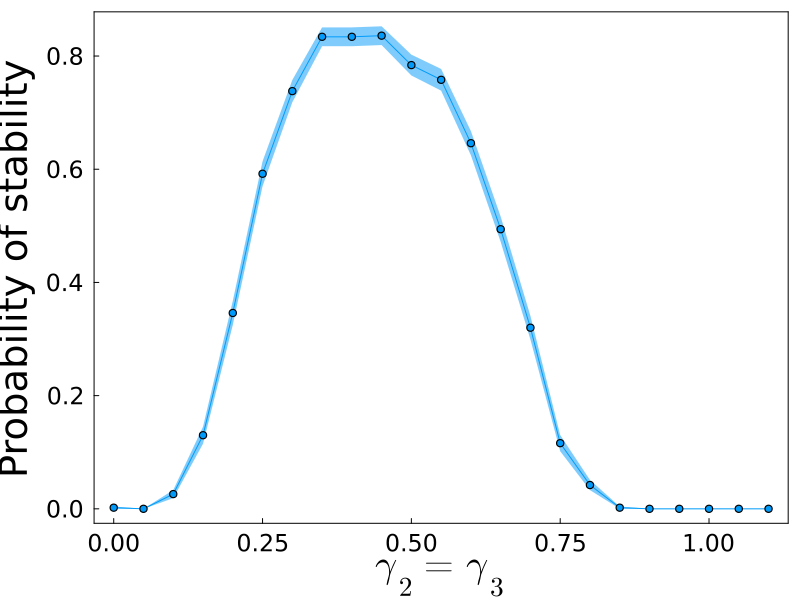

In [4]:
# Use smaller community for faster computation
n = 100
C = 1.0
s = 2

μ = 1.0

interaction_type = "competition_predation" 

realizations = 500

γ_1 = 1.2 
γ_4 = 0.0

denom = sqrt(n * C) * (1 + (2 - 2 * C) / (pi - 2 * C)) * sqrt((pi - 2 * C) / pi) + C * sqrt(2 / pi)

γ_vals = collect(0.0 : 0.05 : 1.1)

mean_stability_arr = []
std_stability_arr = []

@time for val in γ_vals

    # print progress bar
    println("γ_2=γ_3=", val)

    γ_2 = val
    γ_3 = val

    σ_1 = γ_1 / denom # Competition
    σ_2 = (γ_2 / (sqrt(n) * C)) * (pi / (pi - 2)) # Predation 
    σ_3 = (γ_3 / (sqrt(n) * C)) * (pi / (pi - 2)) # Predation
    σ_4 = γ_4 / denom # Competition

    mean_stability, std_stability = model(n, s, μ, σ_1, σ_2, σ_3, σ_4, C, interaction_type, realizations)

    append!(mean_stability_arr, mean_stability)
    append!(std_stability_arr, std_stability)

end

plot(γ_vals, mean_stability_arr, ribbon=std_stability_arr/sqrt(realizations), marker=:circle, 
    label="", xlabel=L"\gamma_2=\gamma_3", ylabel="Probability of stability", size=(800,600), 
    grid=:off, frame=:box, guidefont=26, tickfont=16, legendfont=14, titlefont=18)

For $\gamma_2=\gamma_3=0$ adult-juvenile interactions are negligible and the stage-structured model simplifies to an unstructured model. Because $\gamma_1>d$ the eigenvalues of $M_1$ ($=M$, the community matrix) are positive, and then the communities are always unstable. However, for intermediate values of the cross-stage interaction strength a high proportion of communities are stable. This shows that population structure can stabilize communities, and that if these communities where modelled with an unstructured model we would obtain wrong results (as the eigenvalues of $M_1=M$ are still positive!). Of course, for very strong values of the cross-stage interaction strength the fundamental result from May still holds and the community becomes unstable.

# Sensitivity test of the results to the connectance

We can assess the sensitivity of the results to the connectance by varying the values of C and observing the changes in the stability probabilities. The following plots illustrate the effect of different connectance values on the stability of the system.

In [5]:
# Use smaller community for faster computation
n = 100
s = 2

realizations = 500

interaction_type = "competition_predation" 

μ = 1.0
γ_1 = 1.2 
γ_4 = 0.0

γ_vals = collect(0.0 : 0.05 : 1.1)

Cs = [0.2, 0.5, 0.8, 1.0]

stability_cs = []
std_stability_cs = []

@time for C in Cs

    println("C=", C)

    denom = sqrt(n * C) * (1 + (2 - 2 * C) / (pi - 2 * C)) * sqrt((pi - 2 * C) / pi) + C * sqrt(2 / pi)

    mean_stability_arr = []
    std_stability_arr = []

    for val in γ_vals

        # print progress bar
        println("\tγ_2=γ_3=", val)

        γ_2 = val
        γ_3 = val

        σ_1 = γ_1 / denom # Competition
        σ_2 = (γ_2 / (sqrt(n) * C)) * (pi / (pi - 2)) # Predation 
        σ_3 = (γ_3 / (sqrt(n) * C)) * (pi / (pi - 2)) # Predation
        σ_4 = γ_4 / denom # Competition

        mean_stability, std_stability = model(n, s, μ, σ_1, σ_2, σ_3, σ_4, C, interaction_type, realizations)

        append!(mean_stability_arr, mean_stability)
        append!(std_stability_arr, std_stability)

    end

    # plot!(γ_vals, mean_stability_arr, ribbon=std_stability_arr/sqrt(realizations), marker=:circle, 
    #     label="C=$(C)", xlabel=L"\gamma_2=\gamma_3", ylabel="Probability of stability", size=(800,600), 
    #     grid=:off, frame=:box, guidefont=26, tickfont=16, legendfont=14, titlefont=18)

    push!(stability_cs, mean_stability_arr)
    push!(std_stability_cs, std_stability_arr)

end

# plot!()

C=0.2
	γ_2=γ_3=0.0
	γ_2=γ_3=0.05
	γ_2=γ_3=0.1
	γ_2=γ_3=0.15
	γ_2=γ_3=0.2
	γ_2=γ_3=0.25
	γ_2=γ_3=0.3
	γ_2=γ_3=0.35
	γ_2=γ_3=0.4
	γ_2=γ_3=0.45
	γ_2=γ_3=0.5
	γ_2=γ_3=0.55
	γ_2=γ_3=0.6
	γ_2=γ_3=0.65
	γ_2=γ_3=0.7
	γ_2=γ_3=0.75
	γ_2=γ_3=0.8
	γ_2=γ_3=0.85
	γ_2=γ_3=0.9
	γ_2=γ_3=0.95
	γ_2=γ_3=1.0
	γ_2=γ_3=1.05
	γ_2=γ_3=1.1
C=0.5
	γ_2=γ_3=0.0
	γ_2=γ_3=0.05
	γ_2=γ_3=0.1
	γ_2=γ_3=0.15
	γ_2=γ_3=0.2
	γ_2=γ_3=0.25
	γ_2=γ_3=0.3
	γ_2=γ_3=0.35
	γ_2=γ_3=0.4
	γ_2=γ_3=0.45
	γ_2=γ_3=0.5
	γ_2=γ_3=0.55
	γ_2=γ_3=0.6
	γ_2=γ_3=0.65
	γ_2=γ_3=0.7
	γ_2=γ_3=0.75
	γ_2=γ_3=0.8
	γ_2=γ_3=0.85
	γ_2=γ_3=0.9
	γ_2=γ_3=0.95
	γ_2=γ_3=1.0
	γ_2=γ_3=1.05
	γ_2=γ_3=1.1
C=0.8
	γ_2=γ_3=0.0
	γ_2=γ_3=0.05
	γ_2=γ_3=0.1
	γ_2=γ_3=0.15
	γ_2=γ_3=0.2
	γ_2=γ_3=0.25
	γ_2=γ_3=0.3
	γ_2=γ_3=0.35
	γ_2=γ_3=0.4
	γ_2=γ_3=0.45
	γ_2=γ_3=0.5
	γ_2=γ_3=0.55
	γ_2=γ_3=0.6
	γ_2=γ_3=0.65
	γ_2=γ_3=0.7
	γ_2=γ_3=0.75
	γ_2=γ_3=0.8
	γ_2=γ_3=0.85
	γ_2=γ_3=0.9
	γ_2=γ_3=0.95
	γ_2=γ_3=1.0
	γ_2=γ_3=1.05
	γ_2=γ_3=1.1
C=1.0
	γ_2=γ_3=0.0
	γ_2=γ_3=0.05
	γ_2=γ_3=0.1
	γ_2=γ

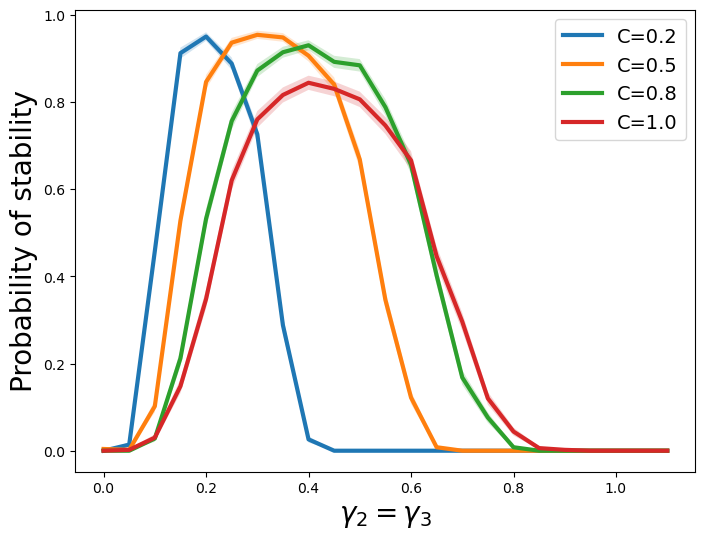

In [6]:
using PyPlot

plt.figure(figsize=(8, 6))

for i in 1:length(Cs)

    C = Cs[i]

    plt.plot(γ_vals, stability_cs[i], lw=3, label="C=$(C)")
    plt.fill_between(γ_vals, stability_cs[i] .- std_stability_cs[i]/sqrt(realizations), stability_cs[i] .+ std_stability_cs[i]/sqrt(realizations), alpha=0.2)

end

plt.xlabel(L"\gamma_2=\gamma_3", fontsize=20)
plt.ylabel("Probability of stability", fontsize=20)

plt.legend(fontsize=14)

plt.savefig("effect_of_C.png", dpi=300)

gcf()